In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path1= '/content/drive/MyDrive/optimization_dataset/dim_date.csv'
path2='/content/drive/MyDrive/optimization_dataset/dim_hotels.csv'
path3='/content/drive/MyDrive/optimization_dataset/dim_rooms.csv'
path4='/content/drive/MyDrive/optimization_dataset/fact_aggregated_bookings.csv'
path5='/content/drive/MyDrive/optimization_dataset/fact_bookings.csv'

In [ ]:
import pandas as pd
df1 = pd.read_csv(path1)
df1.head()


,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [ ]:
df2 = pd.read_csv(path2)
df2.head()


,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [ ]:
df3 = pd.read_csv(path3)
df3.head()


,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
df4 = pd.read_csv(path4)
df4.head()


,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19


In [ ]:
df5 = pd.read_csv(path5)
df5.head()


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


#Data Cleaning

In [ ]:
# Convert booking and stay dates
df5['booking_date'] = pd.to_datetime(df5['booking_date'])
df5['check_in_date'] = pd.to_datetime(df5['check_in_date'])
df5['checkout_date'] = pd.to_datetime(df5['checkout_date'])
df1['date'] = pd.to_datetime(df1['date'])  # Convert dim_date


In [ ]:
df1.isnull().sum()


,0
date,0
mmm yy,0
week no,0
day_type,0


In [ ]:
df2.isnull().sum()


,0
property_id,0
property_name,0
category,0
city,0


In [ ]:
df3.isnull().sum()


,0
room_id,0
room_class,0


In [ ]:
df4.isnull().sum()


,0
property_id,0
check_in_date,0
room_category,0
successful_bookings,0
capacity,0


In [ ]:
df5.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,77907
booking_status,0


In [ ]:
df5.drop_duplicates()  # drop duplicate values

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [ ]:
df4['check_in_date'] = pd.to_datetime(df4['check_in_date'])


#Merge all files in one file named df5

In [ ]:
# Merge room class info
df5 = df5.merge(df3, left_on='room_category', right_on='room_id', how='left')  # df3 = dim_rooms

# Merge hotel metadata
df5 = df5.merge(df2, on='property_id', how='left')  # df2 = dim_hotels

# Merge time dimension (for check-in date)
df5 = df5.merge(df1, left_on='check_in_date', right_on='date', how='left')  # df1 = dim_date


In [ ]:
# Revenue gap percentage
df5['revenue_gap_pct'] = (1 - df5['revenue_realized'] / df5['revenue_generated']) * 100

# Stay duration
df5['stay_duration'] = (df5['checkout_date'] - df5['check_in_date']).dt.days

# Weekday & month of check-in
df5['checkin_weekday'] = df5['check_in_date'].dt.day_name()
df5['checkin_month'] = df5['check_in_date'].dt.month_name()

# Cancellation flag
df5['is_cancelled'] = df5['booking_status'].apply(lambda x: 1 if x.lower() == 'cancelled' else 0)


In [ ]:
df_merged = df5


In [ ]:
df_merged.to_csv('/content/drive/MyDrive/optimization_dataset/cleaned_fact_bookings.csv', index=False)


#EDA

Bookings by Check-in Weekday

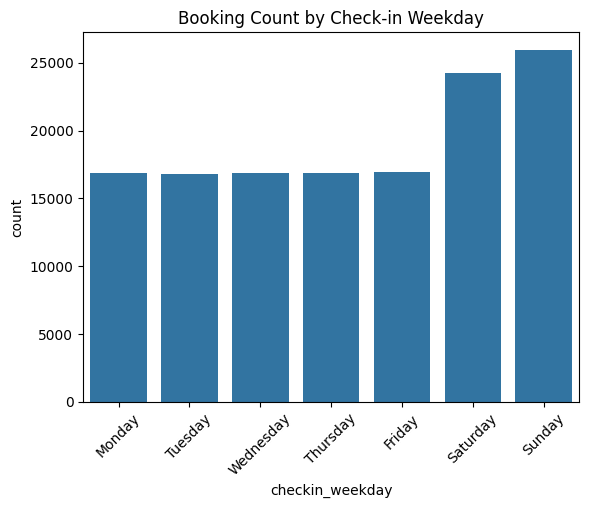

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_merged, x='checkin_weekday',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Booking Count by Check-in Weekday')
plt.xticks(rotation=45)
plt.show()


Monthly Booking Trend

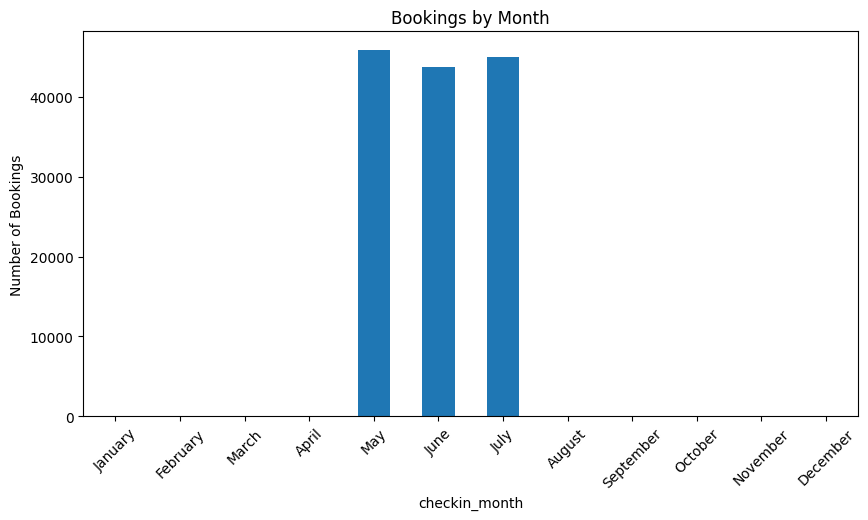

In [ ]:
monthly_bookings = df_merged['checkin_month'].value_counts().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December'])

monthly_bookings.plot(kind='bar', title='Bookings by Month', ylabel='Number of Bookings', figsize=(10, 5))
plt.xticks(rotation=45)
plt.show()


Revenue Gap by Booking Platform

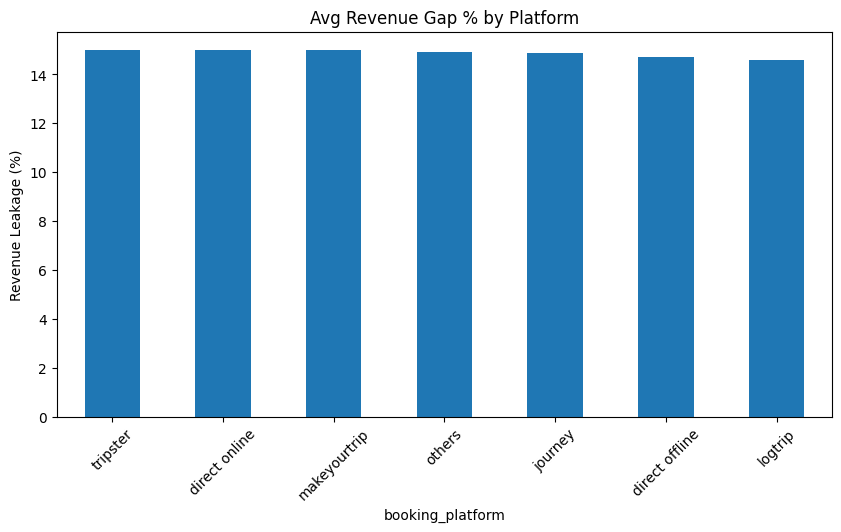

In [ ]:
platform_gap = df_merged.groupby('booking_platform')['revenue_gap_pct'].mean().sort_values(ascending=False)

platform_gap.plot(kind='bar', title='Avg Revenue Gap % by Platform', ylabel='Revenue Leakage (%)', figsize=(10, 5))
plt.xticks(rotation=45)
plt.show()


Cancellation Rate by Room Class

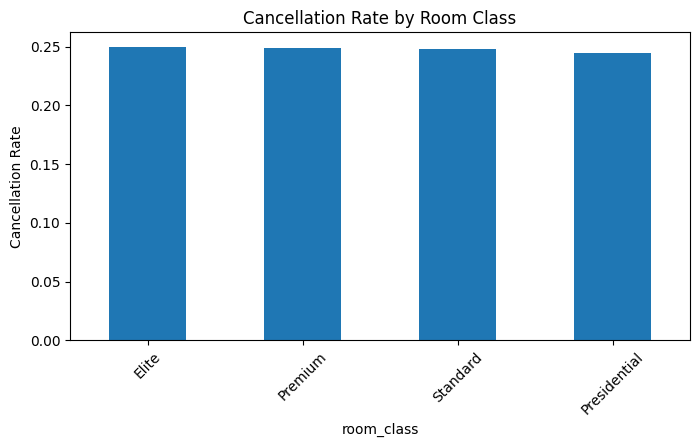

In [ ]:
cancel_rate_room = df_merged.groupby('room_class')['is_cancelled'].mean().sort_values(ascending=False)

cancel_rate_room.plot(kind='bar', title='Cancellation Rate by Room Class', ylabel='Cancellation Rate', figsize=(8, 4))
plt.xticks(rotation=45)
plt.show()


Revenue Generated vs. Realized (by Room Class)

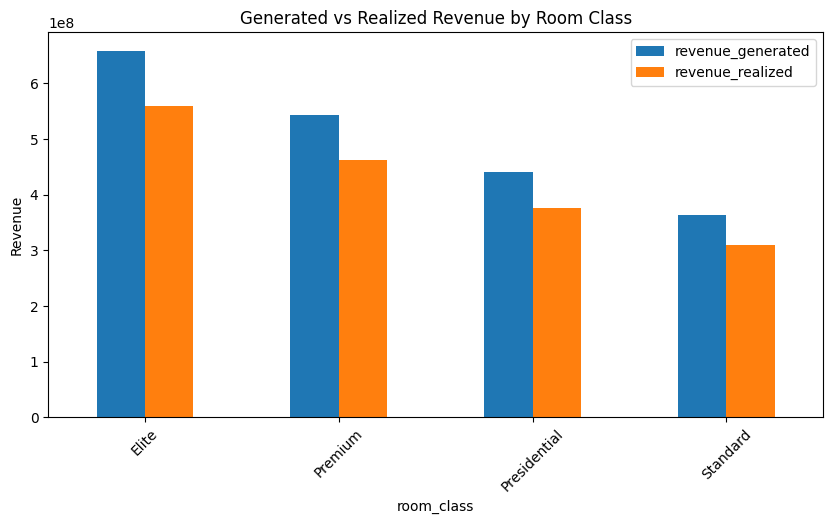

In [ ]:
room_revenue = df_merged.groupby('room_class')[['revenue_generated', 'revenue_realized']].sum()

room_revenue.plot(kind='bar', title='Generated vs Realized Revenue by Room Class', ylabel='Revenue', figsize=(10, 5))
plt.xticks(rotation=45)
plt.show()


In [ ]:
df_merged.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,...,city,date,mmm yy,week no,day_type,revenue_gap_pct,stay_duration,checkin_weekday,checkin_month,is_cancelled
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,...,Delhi,2022-05-01,May 22,W 19,weekend,0.0,1,Sunday,May,0
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,...,Delhi,2022-05-01,May 22,W 19,weekend,60.0,1,Sunday,May,1
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,...,Delhi,2022-05-01,May 22,W 19,weekend,0.0,3,Sunday,May,0
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,...,Delhi,2022-05-01,May 22,W 19,weekend,60.0,1,Sunday,May,1
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,...,Delhi,2022-05-01,May 22,W 19,weekend,0.0,1,Sunday,May,0


In [ ]:
df_merged.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,77907
booking_status,0


#Underperforming room class/service

In [ ]:
room_perf = df_merged.groupby('room_class')[['revenue_realized', 'revenue_gap_pct', 'is_cancelled']].mean()
room_perf = room_perf.sort_values(by='revenue_realized', ascending=False)
room_perf


,revenue_realized,revenue_gap_pct,is_cancelled
room_class,,,
Presidential,23440.103652,14.663100,0.244385
Premium,15120.275600,14.928352,0.248806
Elite,11317.467003,14.976669,0.249611
Standard,8052.356422,14.872809,0.247880


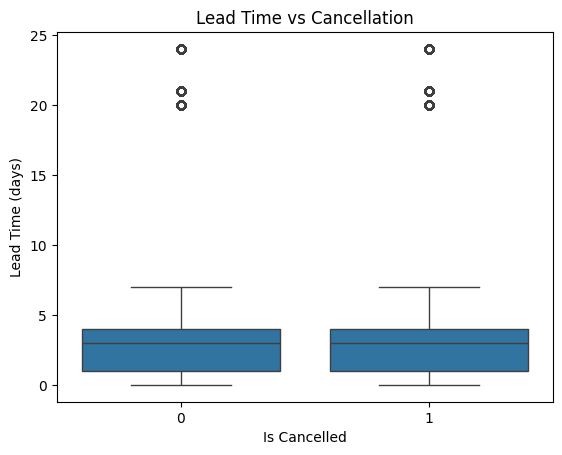

In [ ]:
# Create lead time column
df_merged['lead_time'] = (df_merged['check_in_date'] - df_merged['booking_date']).dt.days

# Visualize cancellation pattern by lead time
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df_merged, x='is_cancelled', y='lead_time')
plt.title('Lead Time vs Cancellation')
plt.xlabel('Is Cancelled')
plt.ylabel('Lead Time (days)')
plt.show()


In [ ]:
# Total revenue leakage
total_leakage = df_merged['revenue_generated'].sum() - df_merged['revenue_realized'].sum()
print(f"Total revenue leakage: ₹{total_leakage:,.2f}")


Total revenue leakage: ₹298,774,986.00


In [ ]:
# Simulate recovery at different levels
for pct in [0.1, 0.15, 0.2]:
    recovered = total_leakage * pct
    print(f"Recovering {int(pct*100)}% leakage would save: ₹{recovered:,.2f}")


Recovering 10% leakage would save: ₹29,877,498.60
Recovering 15% leakage would save: ₹44,816,247.90
Recovering 20% leakage would save: ₹59,754,997.20


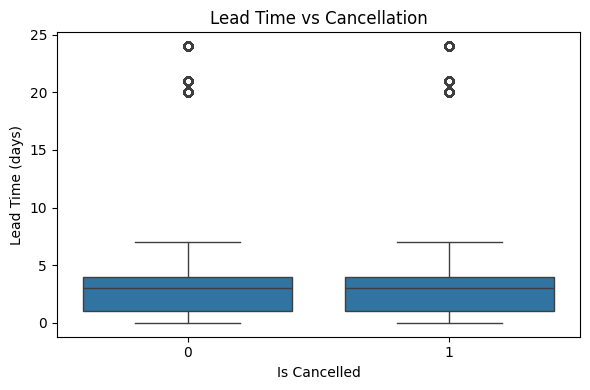

In [ ]:
# Save the lead time plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_merged, x='is_cancelled', y='lead_time')
plt.title('Lead Time vs Cancellation')
plt.xlabel('Is Cancelled')
plt.ylabel('Lead Time (days)')
plt.tight_layout()
plt.savefig('lead_time_vs_cancellation.png')


#customer segmentation

In [ ]:
# Create lead_time if not present
df_merged['lead_time'] = (df_merged['check_in_date'] - df_merged['booking_date']).dt.days

# Create guest ID if not available (simulate using index or booking_id if exists)
df_merged['guest_id'] = df_merged.index  # Replace with actual guest ID column if exists

# Aggregate behavior per guest
guest_profile = df_merged.groupby('guest_id').agg({
    'revenue_realized': 'sum',
    'stay_duration': 'mean',
    'is_cancelled': 'mean',
    'lead_time': 'mean',
    'booking_date': 'count'
}).rename(columns={
    'revenue_realized': 'total_spend',
    'stay_duration': 'avg_stay',
    'is_cancelled': 'cancel_rate',
    'lead_time': 'avg_lead_time',
    'booking_date': 'booking_count'
})

guest_profile.head()


,total_spend,avg_stay,cancel_rate,avg_lead_time,booking_count
guest_id,,,,,
0,10010,1.0,0.0,4.0,1
1,3640,1.0,1.0,1.0,1
2,9100,3.0,0.0,3.0,1
3,3640,1.0,1.0,3.0,1
4,10920,1.0,0.0,4.0,1


In [ ]:
# Use qcut to create 4 revenue-based segments
guest_profile['spend_segment'] = pd.qcut(guest_profile['total_spend'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])


In [ ]:
# Example: Flag risky and loyal customers
guest_profile['is_risky'] = (guest_profile['cancel_rate'] > 0.5).astype(int)
guest_profile['is_loyal'] = ((guest_profile['cancel_rate'] < 0.1) & (guest_profile['booking_count'] > 3)).astype(int)


In [ ]:
# How many guests in each spend segment?
spend_counts = guest_profile['spend_segment'].value_counts()

# Average stats per segment
segment_stats = guest_profile.groupby('spend_segment')[['total_spend', 'avg_stay', 'cancel_rate', 'avg_lead_time']].mean()


#Scenario analysis

Establish the Current Loss

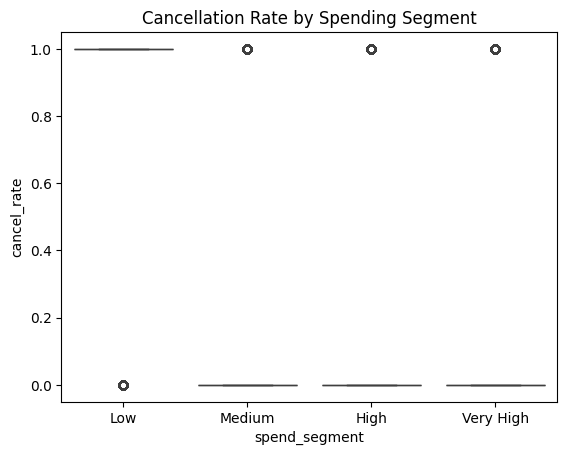

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: Spend vs. Cancel Rate
sns.boxplot(data=guest_profile, x='spend_segment', y='cancel_rate')
plt.title("Cancellation Rate by Spending Segment")
plt.show()


Establish the Current Loss

In [ ]:
# Step 1: Calculate total leakage
leakage_total = df_merged['revenue_generated'].sum() - df_merged['revenue_realized'].sum()
print(f"Total revenue leakage: ₹{leakage_total:,.2f}")

# Step 2: Scenario definitions
scenarios = {
    'Best Case': 0.25,
    'Most Likely': 0.15,
    'Worst Case': 0.05
}

implementation_cost = 100000  # ₹1 lakh implementation budget

# Step 3: Simulate recovery and ROI
results = []
for name, pct in scenarios.items():
    recovered = leakage_total * pct
    net_gain = recovered - implementation_cost
    roi = (net_gain / implementation_cost) * 100
    results.append({
        'Scenario': name,
        'Recovery %': pct * 100,
        'Recovered Revenue': round(recovered),
        'Implementation Cost': implementation_cost,
        'Net Gain': round(net_gain),
        'ROI %': round(roi, 2)
    })

# Step 4: Create summary table
import pandas as pd
scenario_df = pd.DataFrame(results)
scenario_df


Total revenue leakage: ₹298,774,986.00


,Scenario,Recovery %,Recovered Revenue,Implementation Cost,Net Gain,ROI %
0,Best Case,25.0,74693746,100000,74593746,74593.75
1,Most Likely,15.0,44816248,100000,44716248,44716.25
2,Worst Case,5.0,14938749,100000,14838749,14838.75


In [ ]:
# Define scenarios
scenarios = {
    'Best Case': 0.25,
    'Most Likely': 0.15,
    'Worst Case': 0.05
}

implementation_cost = 100000  # ₹1 lakh

# Calculate results
results = []
for name, pct in scenarios.items():
    recovered = leakage_total * pct
    net_gain = recovered - implementation_cost
    roi = (net_gain / implementation_cost) * 100
    results.append({
        'Scenario': name,
        'Recovery %': pct * 100,
        'Recovered Revenue': round(recovered),
        'Implementation Cost': implementation_cost,
        'Net Gain': round(net_gain),
        'ROI %': round(roi, 2)
    })

# Convert to DataFrame
scenario_df = pd.DataFrame(results)
scenario_df


,Scenario,Recovery %,Recovered Revenue,Implementation Cost,Net Gain,ROI %
0,Best Case,25.0,74693746,100000,74593746,74593.75
1,Most Likely,15.0,44816248,100000,44716248,44716.25
2,Worst Case,5.0,14938749,100000,14838749,14838.75


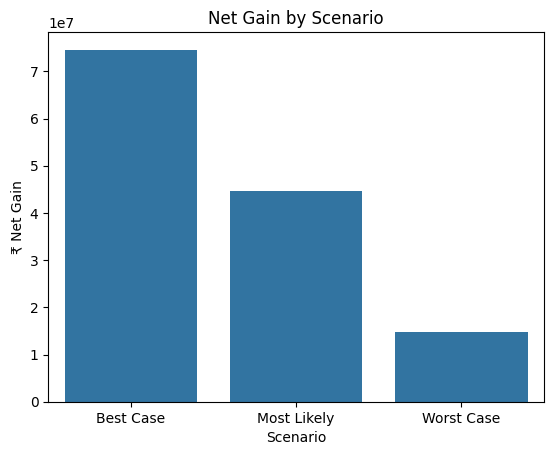

In [ ]:
import seaborn as sns
sns.barplot(data=scenario_df, x='Scenario', y='Net Gain')
plt.title('Net Gain by Scenario')
plt.ylabel('₹ Net Gain')
plt.show()


#payback time

In [ ]:
# Assume monthly gain = Recovered Revenue / 12 months
months = 12  # you can change this to realistic expected months

scenario_df['Monthly Net Gain'] = scenario_df['Recovered Revenue'] / months
scenario_df['Payback Time (months)'] = scenario_df['Implementation Cost'] / scenario_df['Monthly Net Gain']

scenario_df[['Scenario', 'Recovered Revenue', 'Monthly Net Gain', 'Implementation Cost', 'Payback Time (months)']]


,Scenario,Recovered Revenue,Monthly Net Gain,Implementation Cost,Payback Time (months)
0,Best Case,74693746,6.224479e+06,100000,0.016066
1,Most Likely,44816248,3.734687e+06,100000,0.026776
2,Worst Case,14938749,1.244896e+06,100000,0.080328


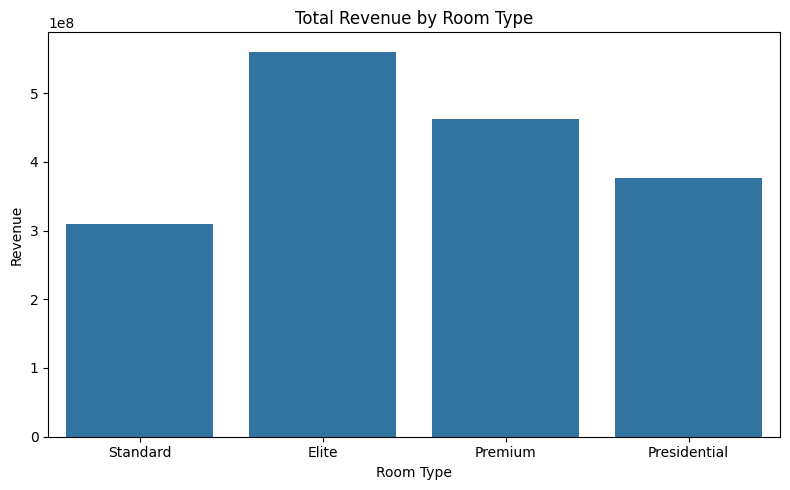

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_merged, x='room_class', y='revenue_realized', estimator=sum, ci=None)
plt.title("Total Revenue by Room Type")
plt.ylabel("Revenue")
plt.xlabel("Room Type")
plt.tight_layout()
plt.show()


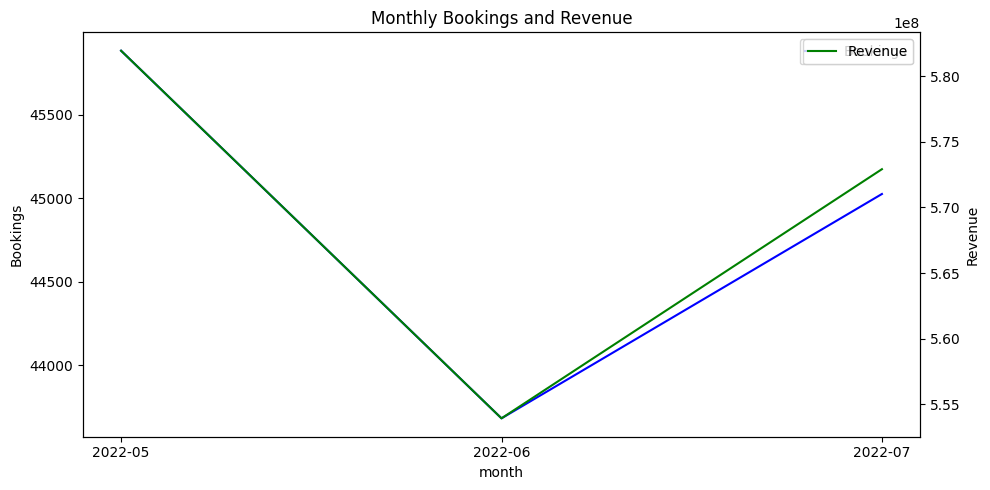

In [ ]:
df_merged['month'] = df_merged['check_in_date'].dt.to_period("M").astype(str)
monthly = df_merged.groupby('month').agg(bookings=('booking_id','count'), revenue=('revenue_realized','sum')).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
sns.lineplot(data=monthly, x='month', y='bookings', ax=ax1, label='Bookings', color='blue')
sns.lineplot(data=monthly, x='month', y='revenue', ax=ax2, label='Revenue', color='green')
ax1.set_ylabel('Bookings')
ax2.set_ylabel('Revenue')
plt.title("Monthly Bookings and Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


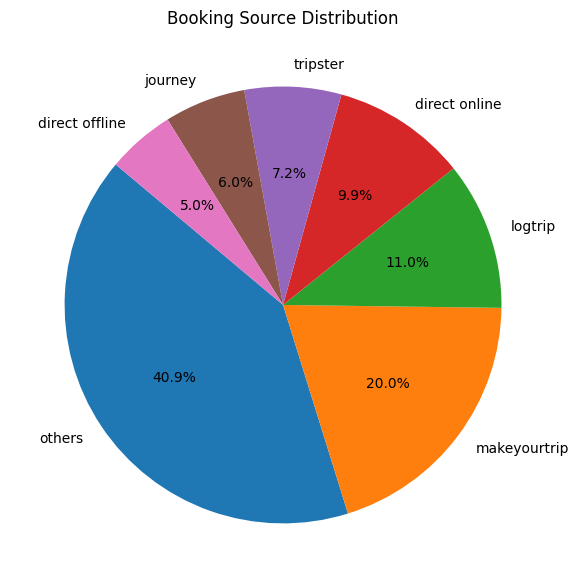

In [ ]:
platform_counts = df_merged['booking_platform'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Booking Source Distribution")
plt.tight_layout()
plt.show()


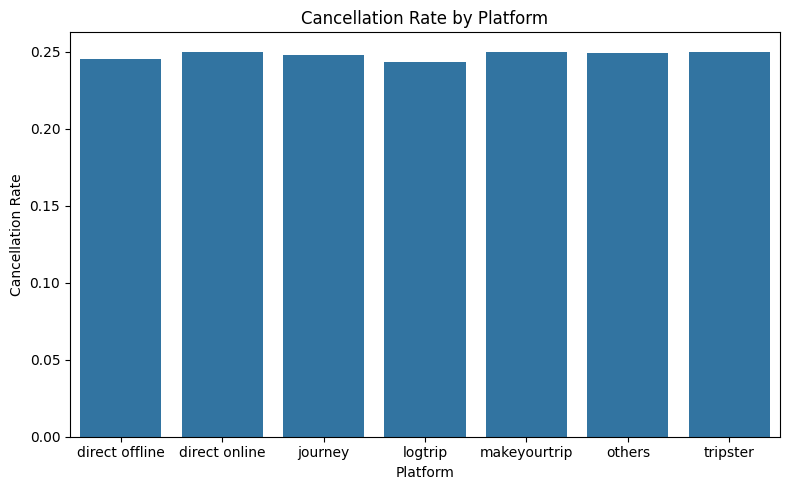

In [ ]:
cancel_rate = df_merged.groupby('booking_platform')['is_cancelled'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=cancel_rate, x='booking_platform', y='is_cancelled')
plt.title("Cancellation Rate by Platform")
plt.ylabel("Cancellation Rate")
plt.xlabel("Platform")
plt.tight_layout()
plt.show()


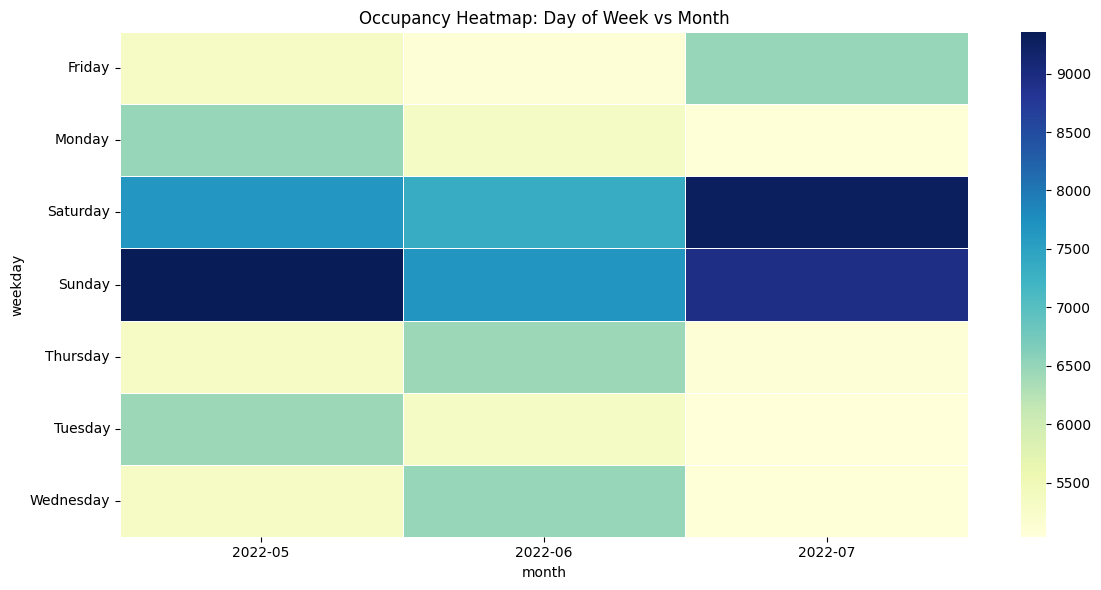

In [ ]:
df_merged['weekday'] = df_merged['check_in_date'].dt.day_name()
weekday_month = df_merged.groupby(['weekday', 'month']).size().unstack(fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(weekday_month, cmap="YlGnBu", linewidths=0.5)
plt.title("Occupancy Heatmap: Day of Week vs Month")
plt.tight_layout()
plt.show()


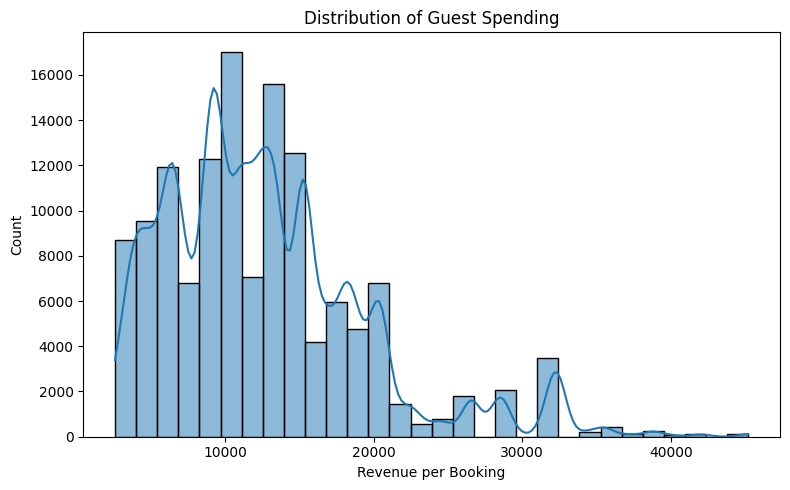

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df_merged['revenue_realized'], bins=30, kde=True)
plt.title("Distribution of Guest Spending")
plt.xlabel("Revenue per Booking")
plt.tight_layout()
plt.show()
